In [1]:
# Hate Speech Recognition using ML Models

# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
# 2. Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/labeled_data.csv")  # Replace with your correct path if needed
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


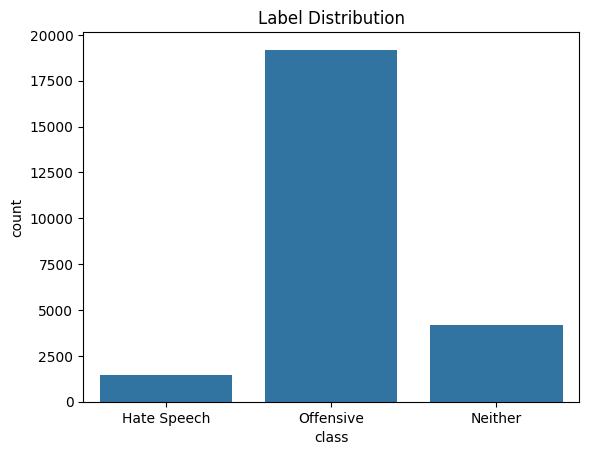

In [3]:
# 3. Basic info and label distribution
df.info()

# Check label distribution
sns.countplot(data=df, x='class')
plt.xticks(ticks=[0, 1, 2], labels=['Hate Speech', 'Offensive', 'Neither'])
plt.title('Label Distribution')
plt.show()


In [4]:
# 4. Preprocessing the tweets

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()
    return text

df['clean_tweet'] = df['tweet'].apply(clean_text)
df[['tweet', 'clean_tweet']].head()


,tweet,clean_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,rt as a woman you shouldnt complain about cle...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dats coldtyga dwn bad for cuffin dat h...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt dawg rt you ever fuck a bitch and she sta...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt the shit you hear about me might be true o...


In [5]:
# 5. Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['clean_tweet'])
y = df['class']  # 0 = Hate Speech, 1 = Offensive, 2 = Neither


In [6]:
# 6. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 7. Train and evaluate Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.51      0.14      0.22       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.81      0.83       835

    accuracy                           0.89      4957
   macro avg       0.75      0.64      0.66      4957
weighted avg       0.87      0.89      0.88      4957



In [8]:
# 8. Train and evaluate Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.80      1.00      0.89      3832
           2       0.93      0.18      0.30       835

    accuracy                           0.80      4957
   macro avg       0.57      0.39      0.40      4957
weighted avg       0.77      0.80      0.74      4957



In [9]:
# 9. Train and evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.44      0.10      0.16       290
           1       0.91      0.96      0.93      3832
           2       0.82      0.82      0.82       835

    accuracy                           0.89      4957
   macro avg       0.73      0.63      0.64      4957
weighted avg       0.87      0.89      0.87      4957



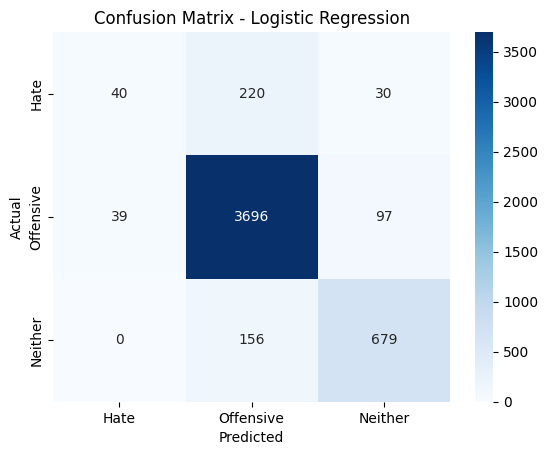

In [10]:
# 10. Confusion Matrix Visualization (for Logistic Regression)
conf_mat = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate', 'Offensive', 'Neither'],
            yticklabels=['Hate', 'Offensive', 'Neither'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


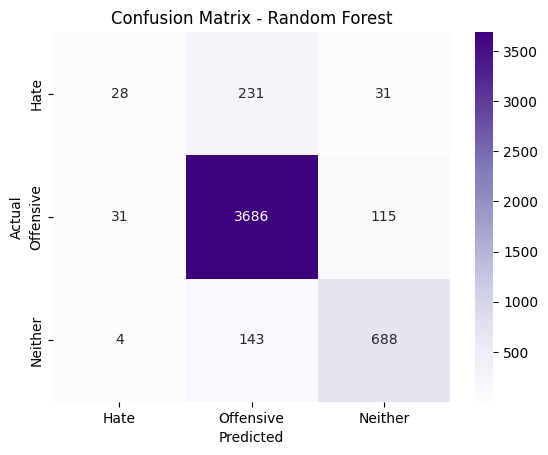

In [13]:
# Confusion Matrix for Random Forest
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Hate', 'Offensive', 'Neither'],
            yticklabels=['Hate', 'Offensive', 'Neither'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


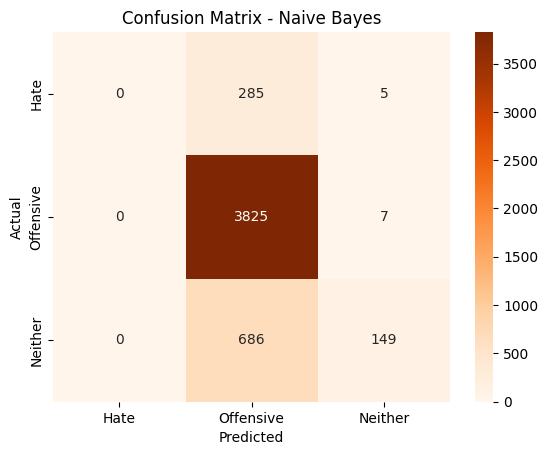

In [14]:
# Confusion Matrix for Naive Bayes
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Hate', 'Offensive', 'Neither'],
            yticklabels=['Hate', 'Offensive', 'Neither'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classifiers
lr_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
nb_clf = MultinomialNB()

# Create Voting Classifier (soft voting assumes all classifiers implement predict_proba)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_clf),
        ('rf', rf_clf),
        ('nb', nb_clf)
    ],
    voting='soft'
)

# Fit the model
voting_clf.fit(X_train, y_train)

# Predict
y_pred_vote = voting_clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_vote)
precision = precision_score(y_test, y_pred_vote, average='weighted')
recall = recall_score(y_test, y_pred_vote, average='weighted')
f1 = f1_score(y_test, y_pred_vote, average='weighted')

# Print scores
print("Voting Classifier Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Voting Classifier Performance:
Accuracy : 0.8737
Precision: 0.8555
Recall   : 0.8737
F1 Score : 0.8460


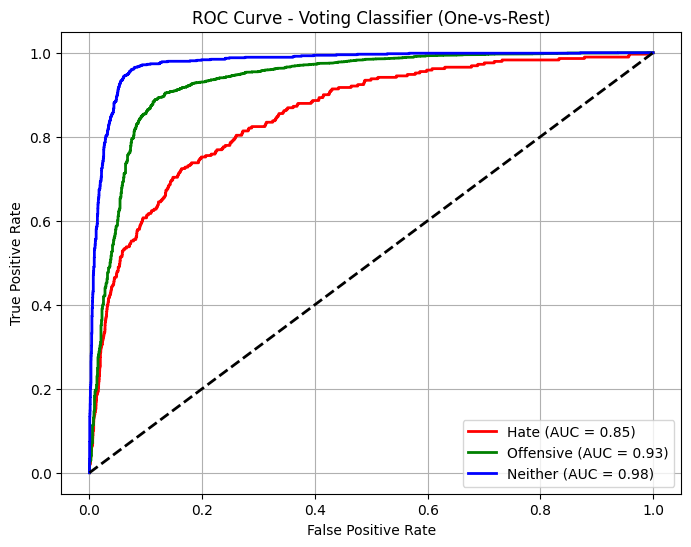

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Binarize labels for ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# One-vs-Rest Voting Classifier
voting_ovr = OneVsRestClassifier(voting_clf)
voting_ovr.fit(X_train, label_binarize(y_train, classes=[0,1,2]))
y_score_vote = voting_ovr.predict_proba(X_test)

# ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_vote[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = ['Hate', 'Offensive', 'Neither']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve - Voting Classifier (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
